In [2]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import yfinance as yf

while 'notebooks' in os.getcwd():
    os.chdir("..")
api_key = "demo"

In [3]:
aapl_news = pd.read_pickle("data/apple_news_sentiment.pkl")

In [4]:
aapl_prices = yf.download(
    'AAPL',
    start='2019-12-30',
    end='2022-12-30'
)

[*********************100%***********************]  1 of 1 completed


In [5]:
sp500_prices = yf.download(
    'SPY',
    start='2019-12-30',
    end='2022-12-30'
)

[*********************100%***********************]  1 of 1 completed


In [6]:
sp500_prices.index = sp500_prices.index.date

In [7]:
aapl_prices.index = aapl_prices.index.date

In [8]:
aapl_prices

,Open,High,Low,Close,Adj Close,Volume
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.095581,144114400
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.615028,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.249023,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.536896,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.114876,118387200
...,...,...,...,...,...,...
2022-12-22,134.350006,134.559998,130.300003,132.229996,131.668243,77852100
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477585,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504547,85438400


In [9]:
aapl_news["date"] = aapl_news["date"].dt.date

In [10]:
aapl_news["sentiment_count"] = aapl_news["sentiment"].map({
    "neutral": 0 ,
    "positive" : 1,
    "negative" : -1
})

In [67]:
def positive_percent(x):
    n_positive = x[x["sentiment"] == "positive"].sentiment_count.count()
    n_neutral = x[x["sentiment"] == "neutral"].sentiment_count.count()
    n_negative = x[x["sentiment"] == "negative"].sentiment_count.count()

    if (n_positive + n_negative + n_neutral == 0):
        return 0

    else:
        return n_positive/(n_positive + n_negative + n_neutral)

In [69]:
positive_percent = aapl_news.groupby("date")\
    .apply(positive_percent)

<AxesSubplot:xlabel='date'>

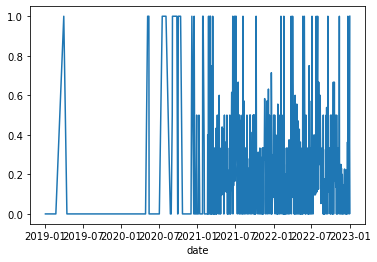

In [70]:
positive_percent.plot()

In [11]:
aapl_sentiment = aapl_news.groupby("date")\
    .sum()\
    .sentiment_count

In [12]:
aapl_news= aapl_news.drop_duplicates(subset="title")

<AxesSubplot:xlabel='date'>

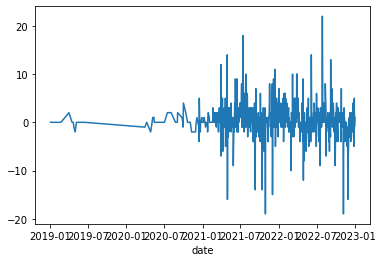

In [13]:
aapl_sentiment.plot()

In [14]:
aapl_sentiment.index = pd.to_datetime(aapl_sentiment.index)

In [15]:
aapl_sentiment.index

DatetimeIndex(['2019-01-03', '2019-02-22', '2019-04-01', '2019-04-16',
               '2019-04-18', '2019-04-22', '2019-04-25', '2019-05-01',
               '2019-05-07', '2019-05-13',
               ...
               '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26',
               '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30',
               '2022-12-31', '2023-01-01'],
              dtype='datetime64[ns]', name='date', length=721, freq=None)

In [16]:
aapl_sentiment.index.isin(aapl_prices.index)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False, False,

In [71]:
valid_dates_sentiments = positive_percent[positive_percent.index.isin(aapl_prices.index)]

IndexError: Boolean index has wrong length: 714 instead of 721

In [18]:
aapl_prices.index

Index([2019-12-30, 2019-12-31, 2020-01-02, 2020-01-03, 2020-01-06, 2020-01-07,
       2020-01-08, 2020-01-09, 2020-01-10, 2020-01-13,
       ...
       2022-12-15, 2022-12-16, 2022-12-19, 2022-12-20, 2022-12-21, 2022-12-22,
       2022-12-23, 2022-12-27, 2022-12-28, 2022-12-29],
      dtype='object', length=757)

In [19]:
aapl_prices_with_news = aapl_prices.loc[valid_dates_sentiments.index]
# sp500_prices_with_news = sp500_prices.loc[valid_dates_sentiments.index]

In [20]:
def consecutive_sign(x):
    result = all(item > 0 for item in x) or all(item < 0 for item in x)
    if result:
        if (x.iloc[0] > 0):
            return 1
        
        else:
            return -1
        
    return 0

In [26]:
consecutive_dates_sign = valid_dates_sentiments.rolling(3)\
    .apply(consecutive_sign)
    

In [27]:
avg_sentiment = valid_dates_sentiments\
    .rolling(4)\
    .median()

<AxesSubplot:xlabel='date'>

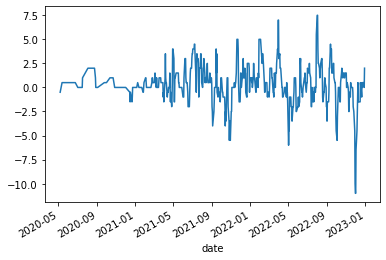

In [28]:
avg_sentiment.plot()

<AxesSubplot:xlabel='date'>

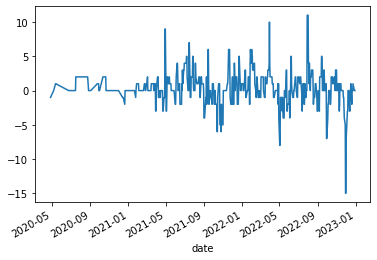

In [24]:
consecutive_dates_sign.plot()

In [33]:
y = aapl_prices.pct_change(-5)\
    .Close

In [45]:
y = aapl_prices.pct_change(-5)\
    .Close\
    .reindex_like(avg_sentiment.dropna())\
    .dropna()

In [44]:
avg_sentiment\
    .reindex_like(y)

date
2020-03-30    NaN
2020-04-08    NaN
2020-04-27    NaN
2020-05-07   -0.5
2020-05-13    0.5
             ... 
2022-12-15   -1.5
2022-12-16    0.5
2022-12-19   -0.5
2022-12-20   -1.0
2022-12-21    0.5
Name: sentiment_count, Length: 520, dtype: float64

In [40]:
from sklearn.linear_model import LinearRegression

In [47]:
avg_sentiment.dropna().reindex_like(y)

date
2020-05-07   -0.5
2020-05-13    0.5
2020-05-14    0.5
2020-06-24    0.5
2020-07-02    0.0
             ... 
2022-12-15   -1.5
2022-12-16    0.5
2022-12-19   -0.5
2022-12-20   -1.0
2022-12-21    0.5
Name: sentiment_count, Length: 517, dtype: float64

In [48]:
y

date
2020-05-07   -0.018738
2020-05-13   -0.036275
2020-05-14   -0.023071
2020-06-24   -0.011123
2020-07-02   -0.051006
                ...   
2022-12-15    0.032292
2022-12-16    0.020097
2022-12-19    0.017996
2022-12-20    0.049667
2022-12-21    0.045058
Name: Close, Length: 517, dtype: float64

In [49]:
model = LinearRegression()
model.fit(pd.DataFrame(avg_sentiment.dropna().reindex_like(y)), y)

LinearRegression()

In [51]:
model.coef_

array([-0.00126071])

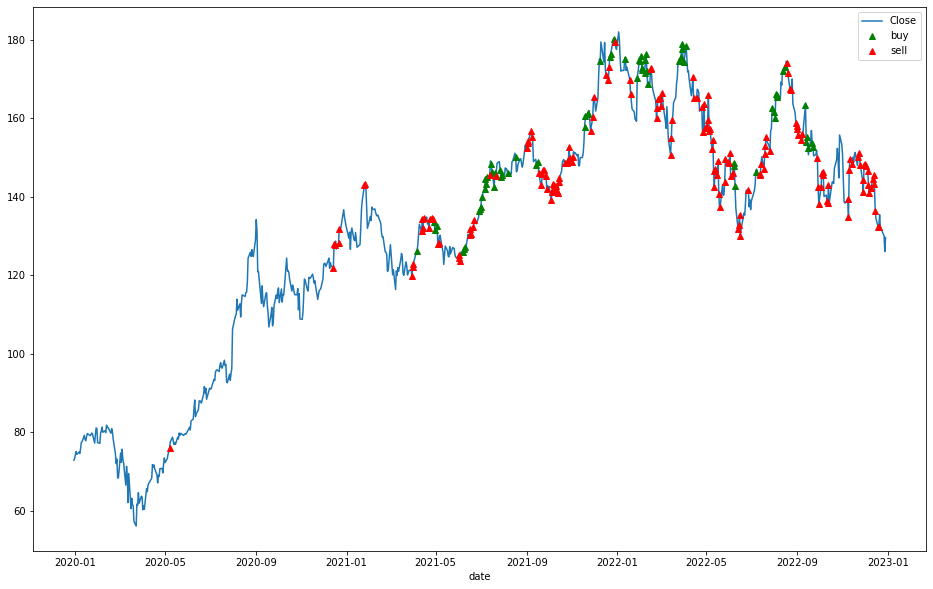

In [29]:
plt.figure(figsize=(16,10))
aapl_prices['Close'].plot()
aapl_prices_with_news[avg_sentiment > 2].Close.plot(
    color = 'green',
    marker = '^',
    linestyle = "None",
    label = "buy"
)

aapl_prices_with_news[avg_sentiment < 0].Close.plot(
    color = 'red',
    marker = '^',
    linestyle = "None",
    label = "sell"
)

plt.legend()
plt.show()

In [94]:
from datetime import datetime, date
aapl_prices.loc[date(2022, 4, 1) : date(2022,7,1)]\
    .query("Close == 130.05999755859375")

,Open,High,Low,Close,Adj Close,Volume
2022-06-16,132.080002,132.389999,129.039993,130.059998,129.113632,108123900


In [102]:
aapl_news.query("date == Timestamp('2022-06-10')")

c:\Users\User\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,date,title,content,sentiment,sentiment_count
4846,2022-06-10,A tangle of cables is the price for Apple’s in...,Jobs followed the Bauhaus movement’s emphasis ...,neutral,0
4847,2022-06-10,"UK plans to probe Apple, Google's mobile brows...",June 10 (Reuters) - Britain's competition watc...,neutral,0
4849,2022-06-10,U.K. regulator probing Apple and Google over m...,The U.K.'s Competition and Markets Authority s...,neutral,0
4850,2022-06-10,"UPDATE 1-UK plans to probe Apple, Google's mob...","(Adds details, quotes, Apple and Google respon...",neutral,0
4851,2022-06-10,2 Reasons Investors Should Love Apple Pay Later,"Device sales face headwinds near term, making ...",neutral,0
4852,2022-06-10,Apple and Google ‘Hold All the Cards.’ The Tec...,The U.K. competition regulator is investigatin...,negative,-1
4853,2022-06-10,Apple and Google targeted by UK competition wa...,Apple and Google will be investigated over the...,neutral,0
4854,2022-06-10,Apple and Google face UK probe over mobile bro...,Competition and Markets Authority consults on ...,negative,-1
4855,2022-06-10,"Apple, Google Face New Antitrust Investigation...",The Competition and Markets Authority wants to...,negative,-1
4856,2022-06-10,This Is How Apple's WWDC Announcements Could A...,"In this video, I will be discussing Square's s...",neutral,0


In [47]:
valid_dates_sentiments[valid_dates_sentiments < -10]

date
2021-04-30   -16
2021-09-10   -14
2021-10-13   -14
2021-10-29   -19
2021-12-02   -15
2022-04-29   -12
2022-11-07   -19
2022-11-28   -16
2022-11-29   -15
Name: sentiment_count, dtype: int64

In [51]:
aapl_news.query("date == Timestamp('2021-10-13') and sentiment_count == -1")

c:\Users\User\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,date,title,content,sentiment,sentiment_count
2501,2021-10-13,Will Apple Feel a Holiday Pinch From Semicondu...,Semiconductor shortages are impacting most tec...,negative,-1
2502,2021-10-13,Apple’s Suppliers Drop as Chip Crunch to Hit I...,(Bloomberg) -- Apple Inc.’s suppliers dropped ...,negative,-1
2506,2021-10-13,Apple Stock Slips Lower After Report Cautions ...,Apple could cut production of its new iPhone 1...,negative,-1
2509,2021-10-13,Dow Jones Futures: Apple iPhone Woes In Focus ...,Futures turned mixed. Apple fell on an iPhone ...,negative,-1
2511,2021-10-13,"Dow Jones Futures Rise: Apple iPhone Woes, Inf...",Futures rose ahead of inflation data and JPMor...,negative,-1
2512,2021-10-13,iPhone Production Cuts May Weigh On Apple’s Ke...,(Bloomberg) -- A possible reduction in iPhone ...,negative,-1
2514,2021-10-13,Apple Finally Falls Victim to Never-Ending Sup...,"(Bloomberg) -- Apple Inc., the world’s most va...",negative,-1
2516,2021-10-13,Apple Manufacturers and Suppliers Fall After i...,A report Tuesday said that Apple would cut its...,negative,-1
2518,2021-10-13,Apple warns of cybercrime risks if EU forces i...,By Foo Yun Chee\n\nBRUSSELS (Reuters) - Apple ...,negative,-1
2521,2021-10-13,iPhones at risk of being hacked if App Store f...,iPhone\n\nApple has hit back at regulatory eff...,negative,-1


In [52]:
aapl_news.query("date == Timestamp('2021-10-14')")

c:\Users\User\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,date,title,content,sentiment,sentiment_count
2535,2021-10-14,Apple is Looking to Turn AirPods Into Health A...,Music. Podcasts. TV. Weather Updates. A remind...,neutral,0
2536,2021-10-14,Apple iPhone 13 Shipment Estimates Lowered at ...,Needham analyst Laura Martin cut her calendar-...,negative,-1
2537,2021-10-14,Why Apple Stock Is Attractive Heading Into the...,Apple (NASDAQ: AAPL) will likely have a record...,positive,1
2538,2021-10-14,Apple's rumored AirPods would be just its late...,Apple CEO Tim Cook delivers his keynote addres...,neutral,0
2539,2021-10-14,Apple Part Shortages Lead One Analyst to Chop ...,Needham's Laura Martin cut her estimated profi...,negative,-1
2540,2021-10-14,Why Apple Shares Are Rising,Shares of companies in the broader technology ...,positive,1
2541,2021-10-14,Tech Support: Is the Apple Watch Series 7 wort...,Yahoo Finance’s Dan Howley breaks down the new...,neutral,0
2542,2021-10-14,US Senate's Latest Antitrust Bill Targets Amaz...,"Sen. Amy Klobuchar, D-Minn., the Senate Judici...",neutral,0
2543,2021-10-14,Features &amp; benefits of the Apple Watch Ser...,Yahoo Finance’s Dan Howley reviews the series ...,positive,1
2544,2021-10-14,"New bills aim at Apple, Google and Facebook as...",U.S. lawmakers introduced another wave of prop...,neutral,0
